## Introdução à computação quântica - Emaranhamento Quântico (Parte I)

![](https://hypescience.com/wp-content/uploads/2016/03/entrelacamento-quantico-a-olho-nu.jpg)

Este material tem como objetivo apresesentar uma breve introdução ao estudo da computação quântica. Em particular, iremos usar uma biblioteca específica open source chamada **Qiskit**. A biblioteca Qiskit acelera o desenvolvimento de aplicações quânticas, fornecendo um conjunto completo de ferramentas necessárias para interagir com sistemas quânticos e simuladores (https://qiskit.org/).

### Criando o primeiro circuito quântico

Vamos criar o nosso primeiro circuito quântico usando a biblioteca do Qiskit. Basicamente, iremos usar o pacote fundamental do Qiskit, chamado de **Terra** (futuramente este pacote será depreciado, consulte no site novas informações sobre os novos pacotes), que fornece os componentes básicos para a programação quântico. De forma simplificada, o processo de desenvolvimento de um circuito quântico apresenta duas "macro etapas": a **construção e a execução**:

* Construção: desenvolvimento do circuito quântico ou algoritmo quântico
* Execução: processamento em uma simulação ou hardware quântico

Após a execução, as saídas serão geradas e tratadas de forma desejada.

#### Importanção das bibliotecas
Para iniciar o nosso circuito quântico, primeiramente vamos importar a biblioteca do Qiskit com todas as respectivas funções dela.

In [2]:
import numpy as np
from qiskit import *
from qiskit.quantum_info import Statevector

#### Inicializando o circuito

Parte fundamentel da construção do circuito é criar uma instância deste circuito onde iremos implementar as portas lógicas quânticas ou gates. Um circuito quântico é uma rotina computacional que consiste em **operações quânticas** coerentes em dados quânticos, como **qubits**. É uma sequência ordenadas de portas quânticas, medições e reinicializações, que podem ser condicionadas à computação clássica em tempo real (https://qiskit.org/documentation/apidoc/circuit.html).

In [3]:
# Criação de um Circuito Quântico atuando em um registrador de n qubits
n = 3
circuit = QuantumCircuit(n)

#### Problema proposto
Neste material, vamos estudar um **estado quântico** específico, chamado de **GHZ** ou **Estado de Greenberger-Horne-Zeilinger**. Este estado na mecânica quântica, é um estado **emaranhado**, ou seja, de forma simplificada, o estado emaranhado é o estado onde duas entidades físicas estão "fortemente correlacionadas" de modo não é possível descrever uma das entidades sem que a outra entidade seja levada em consideração.

Para o estado quântico de Greenberger-Horne-Zeilinger, temos que:

$$GHZ = \frac{1}{\sqrt{d}}\sum_{i=0}^{d-1}|i\rangle\otimes...\otimes|i\rangle = \frac{1}{\sqrt{d}}(|i\rangle\otimes...\otimes|i\rangle+...+|d-1\rangle\otimes...\otimes|d-1\rangle)$$

A expressão acima representa a superposição de todos os estados para $d$ dimensões quaisquer. Um caso específico é dado para um sistema formado por **qubits**, a unidade fundamental da computação quântica (análoga ao bit clássico). Os **qubits** podem assumir os valores 0, 1 e a superposição desses valores, ou seja, 0 e 1 **simultaneamente**. Isso significa que estamos utilizando elementos da **base binária** $B=\left \{ 0,1 \right \}$ para a sua representação, de modo que a dimensão de um qubit é $d=2$, logo, 2 dimensões. Para o estado GHZ, isso se traduz como:

Para $d=2$, então:

$$GHZ = \frac{1}{\sqrt{2}}\sum_{i=0}^{1}|i\rangle\otimes...\otimes|i\rangle = \frac{1}{\sqrt{2}}(|0\rangle\otimes...\otimes|0\rangle+|1\rangle\otimes...\otimes|1\rangle)$$

Perceba que neste estado emaranhado, o estado $|0\rangle$ e $|1\rangle$ se repetem uma quantidade $n$ vezes arbitrária: $|0\rangle\otimes...\otimes|0\rangle$ e $|1\rangle\otimes...\otimes|1\rangle$. Então, podemos simplificar esta notação da seguinte forma:

$$|0\rangle\otimes...\otimes|0\rangle = |0\rangle^{\otimes n}$$
$$|1\rangle\otimes...\otimes|1\rangle = |1\rangle^{\otimes n}$$

De forma que o nosso estado GHZ pode ser representado para $d=2$ como:

$$GHZ = \frac{1}{\sqrt{2}}(|0\rangle^{\otimes n} + |1\rangle^{\otimes n})$$

Agora, nós podemos definir qualquer valor para $n\in\mathbb{N}$. Neste exemplo, vamos utilizar $n = 3$, de modo que:

$$GHZ = \frac{1}{\sqrt{2}}(|0\rangle^{\otimes 3} + |1\rangle^{\otimes 3}) = \frac{1}{\sqrt{2}}(|0\rangle\otimes|0\rangle\otimes|0\rangle + |1\rangle\otimes|1\rangle\otimes|1\rangle) = \frac{1}{\sqrt{2}}(|000\rangle + |111\rangle)$$

$$GHZ =\frac{1}{\sqrt{2}}(|000\rangle + |111\rangle)$$

#### Criando os gates do circuito Greenberger-Horne-Zeilinger
Agora que nós conhecemos o estado GHZ para $d=2$ e um $n$ arbitrário, podemos começar a modelar o circuito com os gates necessários para chegar no **estado quântico emaranhado**.

Este estado, basicamente vai precisar de 1 gate **Hadamard** e 2 **Controlled-X Gates**. Abaixo temos a representação matricial destes dois gates:


$$H = \frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1\\ 1 & -1 \end{bmatrix}$$

$$CNOT(q_0,q_1) =\begin{bmatrix}1 &  0&  0& 0\\ 0&  0&  0& 1\\ 0&  0&  1& 0\\ 0&  1&  0& 0\end{bmatrix}$$

ou

$$CNOT(q_1,q_0) =\begin{bmatrix}
0 &  0&  1& 0\\ 
0 &  1&  0& 0\\ 
1 &  0&  0& 0\\ 
0 &  0&  0& 1
\end{bmatrix}$$

O código abaixo adiciona os gates Hadamard e CNOT descritos acima:

In [4]:
# Adicionar o Hadamard Gate no qubit 0, colocando este qubit no estado de superposição
circuit.h(0)
# Adicionar o Controlled-X Gate com o qubit de controle 0 e como alvo o qubit 1, colocando estes qubits em um Estado de Bell
circuit.cx(0, 1)
# Adicionar o Controlled-X Gate com o qubit de controle 0 e como alvo o qubit 2, colocando estes qubits em um estado de GHZ
circuit.cx(0, 2)

Vamos agora visualizar o circuito quântico construído até o momento, para isso, usando a função **draw()** fornecida pela biblioteca do Qiskit:

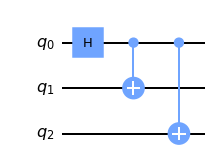

In [5]:
circuit.draw('mpl')

Este circuito constrói o nosso **estado de emaranhamento quântico de GHZ**. Agora, podemos realizar a **medição** dos resultados:

In [6]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circuit)
result = job.result()
outputstate = result.get_statevector(circuit, decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


#### Estudo analítico do Estado Greenberger-Horne-Zeilinger

Podemos também resolver este problema analiticamente usando os conceitos de **álgebra linear**. Inicialmente, sabemos que os qubits $q_{0}$, $q_{1}$ e $q_{2}$ estão inicializados no estado $|0\rangle$, representando-os da seguinte forma:

$$q_{0}=|0\rangle =\begin{pmatrix}1\\ 0\end{pmatrix}$$

$$q_{1}=|0\rangle =\begin{pmatrix}1\\ 0\end{pmatrix}$$

$$q_{2}=|0\rangle =\begin{pmatrix}1\\ 0\end{pmatrix}$$

Então, vamos definir um estado $|\psi_{0}\rangle$ que vai corresponder à aplicação do primeiro gate (Hadamard), que será dado por:

$$|\psi_{0}\rangle = |0\rangle\otimes|0\rangle\otimes H|0\rangle$$

$$|\psi_{0}\rangle =\begin{pmatrix}1\\ 0\end{pmatrix}\otimes\begin{pmatrix}1\\ 0\end{pmatrix}\otimes\frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1\\ 1 & -1\end{pmatrix}\begin{pmatrix}1\\ 0\end{pmatrix}$$

Primeiro, vamos realizar a multiplicação da matriz de Hadamard com a matriz coluna que representa o estado 0:

$$|\psi_{0}\rangle = \begin{pmatrix}1\\ 0\end{pmatrix}\otimes\begin{pmatrix}1\\ 0\end{pmatrix}\frac{1}{\sqrt{2}}\begin{pmatrix}1\\ 1\end{pmatrix}$$

Agora podemos realizar o cálculo tensorial entre as matrizes:

$$|\psi_{0}\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix}1 &  1&  0&  0&  0&  0&  0& 0 \end{pmatrix}^{T} $$

Vamos verificar este resultado segmentando o circuito:

In [12]:
#Primeira parte do circuito
circuit = QuantumCircuit(n)
# Adicionar o Hadamard Gate no qubit 0, colocando este qubit no estado de superposição
circuit.h(0)
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circuit)
result = job.result()
outputstate = result.get_statevector(circuit, decimals=3)

state = Statevector.from_int(0, 2**3)
state = state.evolve(circuit)
state.draw('latex')

<IPython.core.display.Latex object>

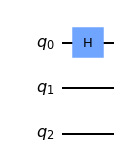

In [8]:
circuit.draw('mpl')

Agora podemos calcular o próximo estado na sequência do circuito, aqui denominado de $|\psi_{1}\rangle$ onde iremos adicionar o primeiro Controlled-X Gate:

O primeiro Controlled-X Gate, tem como qubit "controlador" o qubit $q_{0}$, enquanto o qubit "alvo" será o qubit $q_{1}$. Vamos então aplicar o Controller-X Gate no nosso estado $|\psi_{0}\rangle$:

$$|\psi_{1}\rangle=C_{x}|\psi_{0}\rangle=|0\rangle\otimes \begin{bmatrix}1 &  0&  0& 0\\ 0&  0&  0& 1\\ 0&  0&  1& 0\\ 0&  1&  0& 0\end{bmatrix} (|0\rangle \otimes H|0\rangle)=\begin{bmatrix}1\\0\end{bmatrix}\otimes \begin{bmatrix}1 &  0&  0& 0\\ 0&  0&  0& 1\\ 0&  0&  1& 0\\ 0&  1&  0& 0\end{bmatrix} \left ( \begin{bmatrix}
1\\ 
0
\end{bmatrix}  \otimes \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1\\ 
1 & -1
\end{bmatrix}\begin{bmatrix}1\\0\end{bmatrix} \right)$$

$$|\psi_{1}\rangle=C_{x}|\psi_{0}\rangle=\begin{bmatrix}1\\0\end{bmatrix} \otimes \frac{1}{\sqrt{2}}.\begin{bmatrix}1 &  0&  0& 0\\ 0&  0&  0& 1\\ 0&  0&  1& 0\\ 0&  1&  0& 0\end{bmatrix}.\begin{bmatrix}
1\\ 
1\\ 
0\\ 
0
\end{bmatrix} = \begin{bmatrix}1\\ 0\end{bmatrix} \otimes \frac{1}{\sqrt{2}}.\begin{bmatrix}
1\\ 
0\\ 
0\\ 
1
\end{bmatrix} = \frac{1}{\sqrt{2}}.\begin{pmatrix}
1 &  0&  0&  1&  0&  0&  0& 0 
\end{pmatrix}^{T}$$

Novamente, vamos validar se este resultado está coerente com o esperado para o novo estado $|\psi_{1}\rangle$

In [15]:
#Primeira parte do circuito
circuit = QuantumCircuit(n)
# Adicionar o Hadamard Gate no qubit 0, colocando este qubit no estado de superposição
circuit.h(0)
# Adicionar o Controlled-X Gate com o qubit de controle 0 e como alvo o qubit 1, colocando estes qubits em um Estado de Bell
circuit.cx(0, 1)
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circuit)
result = job.result()
outputstate = result.get_statevector(circuit, decimals=3)

state = Statevector.from_int(0, 2**3)
state = state.evolve(circuit)
state.draw('latex')

<IPython.core.display.Latex object>

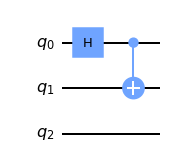

In [14]:
circuit.draw('mpl')

A última etapa deste estudo agora é aplicar o último Controlled-X Gate no nosso circuito quântico e então chegar no resultado esperado. Para isso, vamos agora criar o novo estado $|\psi_{2}\rangle$. Para este estado $|\psi_{2}\rangle$, vamos ter o qubit de controle $q_{0}$ e o qubit alvo sendo o qubit $q_{2}$. É importante observar que neste caso, os dois qubits não são adjacentes, de modo que a nossa matriz de controle irá ter uma dimensão maior do que anteriormente. Sendo assim, temos:

Lembrando que:

$$|\psi_{1}\rangle = \frac{1}{\sqrt{2}}.\begin{pmatrix}
1 &  0&  0&  1&  0&  0&  0& 0 
\end{pmatrix}^{T}$$

Então basta realizarmos a multiplicação matricial:

$$|\psi_{2}\rangle=C_{x}|\psi_{1}\rangle=\frac{1}{\sqrt{2}}.\begin{bmatrix}
1 &  0&  0&  0&  0&  0&  0& 0\\ 
0 &  0&  0&  0&  0&  1&  0& 0\\ 
0 &  0&  1&  0&  0&  0&  0& 0\\ 
0 &  0&  0&  0&  0&  0&  0& 1\\ 
0 &  0&  0&  0&  1&  0&  0& 0\\ 
0 &  1&  0&  0&  0&  0&  0& 0\\ 
0 &  0&  0&  0&  0&  0&  1& 0\\ 
0 &  0&  0&  1&  0&  0&  0& 0
\end{bmatrix}.\begin{bmatrix}
1\\ 
0\\ 
0\\ 
1\\ 
0\\ 
0\\ 
0\\
0
\end{bmatrix}=\frac{1}{\sqrt{2}}.\begin{bmatrix}
1\\ 
0\\ 
0\\ 
0\\ 
0\\ 
0\\ 
0\\
1
\end{bmatrix}$$

Esta matriz pode ser representada agora em termos dos estados que será dado por:

$$|\psi_{2}\rangle = \frac{1}{\sqrt{2}}\left (|000\rangle + |111\rangle  \right )$$

Dado que:

$$|000\rangle = \begin{bmatrix}
1\\ 
0\\ 
0\\ 
0\\ 
0\\ 
0\\ 
0\\
0
\end{bmatrix}$$

$$|111\rangle = \begin{bmatrix}
0\\ 
0\\ 
0\\ 
0\\ 
0\\ 
0\\ 
0\\
1
\end{bmatrix}$$

Logo, o nosso estado $|\psi_{2}\rangle$ corresponde ao nosso **estado quântico emaranhado** de Greenbergen-Horne-Zeilinger (GHZ)

In [11]:
#Primeira parte do circuito
circuit = QuantumCircuit(n)
# Adicionar o Hadamard Gate no qubit 0, colocando este qubit no estado de superposição
circuit.h(0)
# Adicionar o Controlled-X Gate com o qubit de controle 0 e como alvo o qubit 1, colocando estes qubits em um Estado de Bell
circuit.cx(0, 1)
circuit.cx(0, 2)
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circuit)
result = job.result()
outputstate = result.get_statevector(circuit, decimals=3)

state = Statevector.from_int(0, 2**3)
state = state.evolve(circuit)
state.draw('latex')

<IPython.core.display.Latex object>

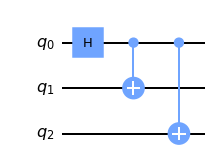

In [14]:
circuit.draw('mpl')

### Referências
https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html

https://qiskit.org/documentation/tutorials/circuits_advanced/03_advanced_circuit_visualization.html

https://hypescience.com/emaranhado-quantico-acabou-de-ser-diretamente-observado-em-uma-escala-macroscopica-maior/

https://www.youtube.com/watch?v=g0FVmzkiUqU&ab_channel=QuantumComputing

https://people.math.gatech.edu/~jeanbel/4782/Year09/problem207.pdf

https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html

https://quantumcomputing.stackexchange.com/questions/4252/how-to-derive-the-cnot-matrix-for-a-3-qubit-system-where-the-control-target-qu

https://en.wikipedia.org/wiki/Controlled_NOT_gate

https://hypescience.com/wp-content/uploads/2016/03/entrelacamento-quantico-a-olho-nu.jpg